#### PYTHON LIBRARIES

In [2]:
#Importing different pythin libraries
import numpy as np #Numeric Python
import pandas as pd #Used for data manipulation
import matplotlib.pyplot as plt #Used for data visualization
import seaborn as sns #used to make satistical graphs of datasets
from sklearn import linear_model
from sklearn.metrics import r2_score

#### Input Data

In [5]:
mydata = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\banking_loanapproval.csv") #when pasting the path, add double slashes to the file path
mydata.head(10) #this prints the first 10 rows of the file

,CustomerID,Income,#CreditCards,LoanAmountinK,#LoanAccounts
0,5409,37073,1,90,1
1,5477,50721,1,260,2
2,5507,43578,2,0,0
3,8,69553,1,0,0
4,158,37502,1,0,0
5,173,34722,1,360,3
6,5408,56607,1,0,0
7,5579,55328,1,0,0
8,5695,42752,1,30,1
9,5732,71450,1,160,1


In [6]:
mydata.info() #this prints info about the file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     1000 non-null   int64
 1   Income         1000 non-null   int64
 2   #CreditCards   1000 non-null   int64
 3   LoanAmountinK  1000 non-null   int64
 4   #LoanAccounts  1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


#### Checking for missing values

In [7]:
mydata.isnull().sum()

CustomerID       0
Income           0
#CreditCards     0
LoanAmountinK    0
#LoanAccounts    0
dtype: int64

In [8]:
dataset = mydata.drop('CustomerID', axis = 1) #this deletes the CustomerID column from the data set
dataset.describe() #describe summarizes the data set

,Income,#CreditCards,LoanAmountinK,#LoanAccounts
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,49889.122000,1.120000,174.270000,1.338000
std,11543.376501,0.325124,218.449049,1.374644
min,17418.000000,1.000000,0.000000,0.000000
25%,42285.000000,1.000000,0.000000,0.000000
50%,49396.000000,1.000000,100.000000,1.000000
75%,57317.000000,1.000000,220.000000,2.000000
max,80874.000000,2.000000,1680.000000,7.000000


#### Exploratory Data Analysis (EDA)

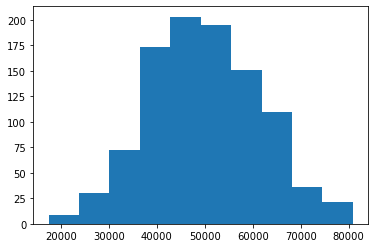

In [9]:
plt.hist(dataset.Income);

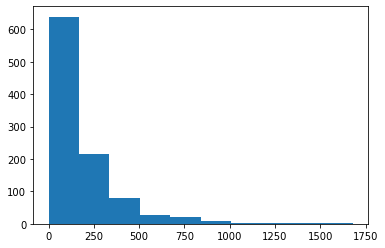

In [11]:
plt.hist(dataset.LoanAmountinK);

In [12]:
dataset.rename(columns = {'#LoanAccounts': 'LoanAccounts', '#CreditCards': 'CreditCards'}, inplace = True)
#Even if is it one column, use columns

In [13]:
dataset.head(6)

,Income,CreditCards,LoanAmountinK,LoanAccounts
0,37073,1,90,1
1,50721,1,260,2
2,43578,2,0,0
3,69553,1,0,0
4,37502,1,0,0
5,34722,1,360,3


#### Correlation

In [17]:
Correlation = round(dataset.corr(),5)
Correlation
#2 means to tound to 2 decimal places

,Income,CreditCards,LoanAmountinK,LoanAccounts
Income,1.00000,-0.03243,-0.01497,-0.01555
CreditCards,-0.03243,1.00000,0.01617,-0.05277
LoanAmountinK,-0.01497,0.01617,1.00000,0.76548
LoanAccounts,-0.01555,-0.05277,0.76548,1.00000


In [16]:
Correlation=dataset.LoanAmountinK.corr(dataset.LoanAccounts)
Correlation
#TO CHECK CORRELATION OF LOANAMOUNT ON LOAN ACCOUNT

0.7654829825637872

#### Linear Regression

In [23]:
#Drop other columns in dataset except LoanAccount
x = dataset.drop(columns= ['Income', 'LoanAmountinK', 'CreditCards']) #Independent Variable
y = dataset['LoanAmountinK'] #Dependent Variable
y.head()

0     90
1    260
2      0
3      0
4      0
Name: LoanAmountinK, dtype: int64

In [24]:
m = dataset[['LoanAccounts']]
v = dataset['LoanAmountinK']
v.head()
#Another way of renaming your dataset. Instead of deleting columns you can pick out the columns you want.

0     90
1    260
2      0
3      0
4      0
Name: LoanAmountinK, dtype: int64

In [25]:
#To fit a simple Linear regression model
mymodel = linear_model.LinearRegression()
#You can also use: mymodel = linearRegression()
mymodel.fit(x,y)

LinearRegression()

In [27]:
print('coefficient:', mymodel.coef_)
print('Intercept:', mymodel.intercept_)


coefficient: [121.64535035]
Intercept: 11.508521228379038


In [31]:
print('LoanAmountinK = {} + {} * LoanAccounts'.format(mymodel.intercept_.round(2), mymodel.coef_[0].round(2))) #y=a+bx

LoanAmountinK = 11.51 + 121.65 * LoanAccounts


#### An increase in number of LoanAccounts by 1 unit would lead to an increase in the loan by 121.654k

In [33]:
#To predict Y from X (LoanAmount from LoanAccounts)
y_pred = mymodel.predict(x)
y_pred = pd.Series(y_pred) #to covert from series to panda
y_pred.head()


0    133.153872
1    254.799222
2     11.508521
3     11.508521
4     11.508521
dtype: float64

In [34]:
#to calculate the r square score of the model
r_training = r2_score(y, y_pred)
r_training

0.5859641965947497

<AxesSubplot:xlabel='LoanAccounts', ylabel='LoanAmountinK'>

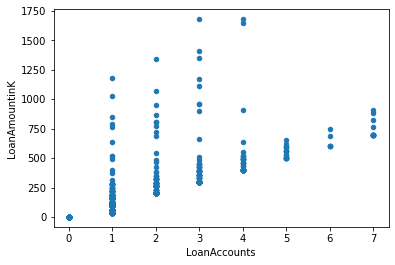

In [36]:
#to draw a scatter diagram
dataset.plot('LoanAccounts', 'LoanAmountinK', kind = 'scatter')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


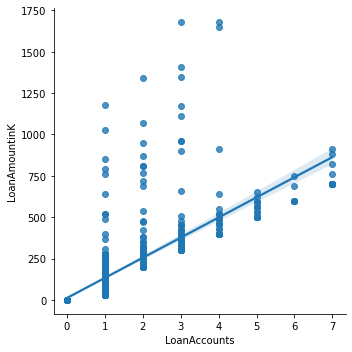

In [38]:
#To draw regression line
sns.lmplot('LoanAccounts', 'LoanAmountinK', data = dataset, fit_reg = True)

#### Multiple Regression

<AxesSubplot:>

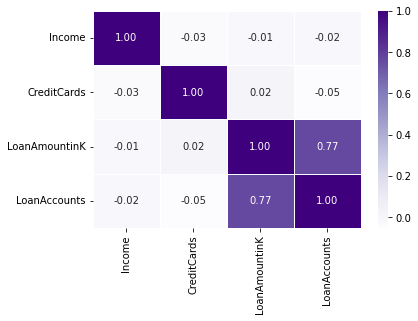

In [40]:
#To calculate correlation coefficient (r) between all the variables in the data set
sns.heatmap(dataset.corr(),annot=True,cmap='Purples', fmt='.2f', linewidths=0.8)
#annot is annotation, cmap (heat map) sets the color of the values with correlation, fmt sets the no of decimal places.
#Always put s at the back of the colors.

In [41]:
a = dataset.drop(columns = ['LoanAmountinK']) #Independent variables (Income, credit card and No of Loan Accounts)
b = dataset['LoanAmountinK'] #dependent vaariable

In [42]:
b.head()

0     90
1    260
2      0
3      0
4      0
Name: LoanAmountinK, dtype: int64

In [45]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(a,b,test_size=0.2, random_state=0)
X_test.head()
X_test.shape

#personal, read on random state.
#result means 200 for test, 800 for train out of 1000 rows
#this is a python algorithm. The one below (47) is the manual way

(200, 3)

In [47]:
#split the data (independent variable) into train/test sets (80/20)
a_train = a[:-200] #to exclude the last 200 rows or get the first 800 rows from 1000 records (row,column)
a_test = a[-200:] #to capture the last 200 rows or get the last 200 rows

#Split the target (dependent variable) into train/test sets
b_train = b[:800]
b_test = b[800:]

a_test.head() #to print the first 5 values
a_test.shape

#this is the manual way. The one above (45) is the python way of splitting into test and train

(200, 3)

In [48]:
model = linear_model.LinearRegression()
model.fit(a_train, b_train) #manual way

LinearRegression()

In [49]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train) #From python package

LinearRegression()

In [50]:
#Print the coefficient and intercept of the multiple regression model
print('Coefficient:',model.coef_)
print('Intercept:',model.intercept_)

#you should always print your coefficient and intercept

Coefficient: [1.56042499e-04 3.91959055e+01 1.21467340e+02]
Intercept: -40.32041634854335


In [52]:
#to print the multiple regression model equation
print('LoanAMountinK = {} + {} * Income + {} * CreditCards + {} * LoanAccounts'.format(model.intercept_.round(2),
                                    model.coef_[0].round(4),model.coef_[1].round(4), model.coef_[2].round(4)))

LoanAMountinK = -40.32 + 0.0002 * Income + 39.1959 * CreditCards + 121.4673 * LoanAccounts


#### An increase in number of LoanAccounts by 1 unit would increase in the loan by 121.47K.

#### An increase in number of Creditcards by 1 unit would increase in the loan by 39.20K.

#### An increase in number of Income by 1 unit would increase in the loan by 0.0002K.

In [72]:
#to predict the value of y from x (LoanAmountinK from income, creditcards and LoanAccounts)
y_pred1 = pd.Series(model.predict(X_test))
y_pred1

0        5.323945
1      130.307860
2        7.834669
3      167.565873
4      374.994742
          ...    
195    126.460788
196    129.564785
197    247.192856
198    246.977517
199    125.928527
Length: 200, dtype: float64

In [73]:
#to predict the value of y from x (LoanAmountinK from income, creditcards and LoanAccounts) (manual)
y_pred2 = pd.Series(model.predict(a_test))
y_pred2

0        4.646253
1      126.194735
2      248.810080
3      126.194735
4      126.485286
          ...    
195    128.733079
196      9.059291
197    410.607755
198    128.507753
199      3.360463
Length: 200, dtype: float64

In [57]:
Y_test

993      0
859    160
298      0
553    220
672    390
      ... 
679    100
722    100
215    200
653    200
150    100
Name: LoanAmountinK, Length: 200, dtype: int64

In [61]:
listt = list(zip(y_pred1, Y_test))
check = pd.DataFrame(listt)
check.rename(columns={0:'Predicted',1:'Actual'})

,Predicted,Actual
0,5.323945,0
1,130.307860,160
2,7.834669,0
3,167.565873,220
4,374.994742,390
...,...,...
195,126.460788,100
196,129.564785,100
197,247.192856,200
198,246.977517,200


#### Checking the model accuracy - Linear Model

In [62]:
from sklearn.metrics import r2_score
r = r2_score(Y_test,y_pred1)
r

0.658747589066187

#### r square of the multiple regression model is 66%

In [74]:
from sklearn.metrics import r2_score #manual
r = r2_score(b_test,y_pred2)
r

0.5148671440205232

#### r square of the multiple regression model is 51%

In [69]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,y_pred1)
mse

12524.454031611653

In [70]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,y_pred1)
mae

54.82033931764315

#### Plotting Actual vs. Predicted

In [67]:
x_index = np.arange(200)
#number of rows we are working with

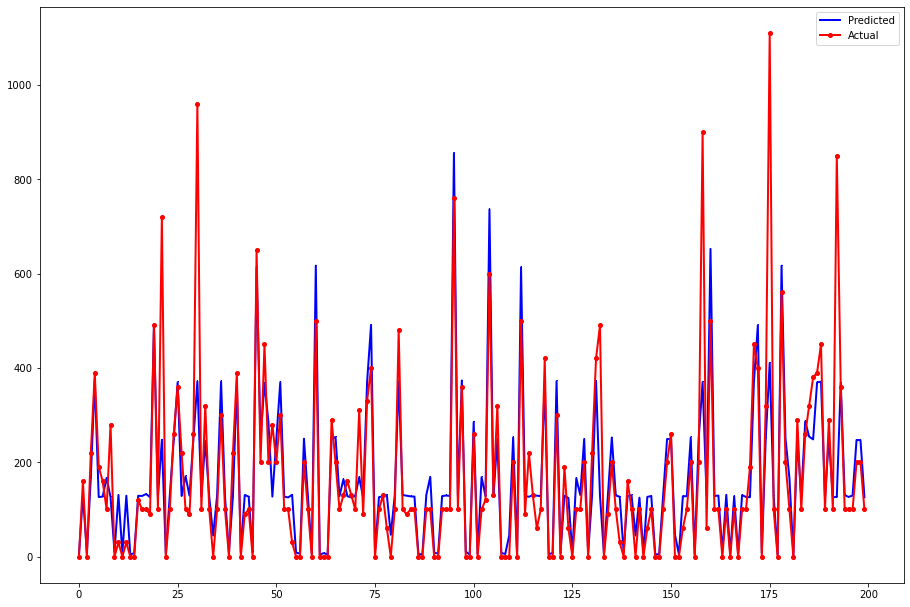

In [71]:
fig = plt.figure()
axes = fig.add_axes([0,0,2,2])

axes.plot(x_index,y_pred1,label='Predicted',marker=',',color = 'blue',lw=2,markersize = 8)
axes.plot(x_index,Y_test,label='Actual',marker='.',color='red',lw=2,markersize =8)
axes.legend()